In [9]:
from src.solution import MultiODPath, MultiODSolution
from src.problem import MultiODProblem
from src.operators import TwoOptOperator, ExchangeOperator, InsertOperator, OForwardOperator, DBackwardOperator
from src.utils import display_result

p = MultiODProblem(num_O=8, num_taxi=1, seed=1)
paths = [[0, 1, 9, 8, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]
paths1 = [[0, 1, 8, 9, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths2 = [[0, 1, 9, 8, 16, 5, 17, 3, 2, 7, 4, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths3 = [[i for i in range(18)] + [0]]
s = MultiODSolution(paths3, p)

In [10]:
path = s.paths[0]

In [11]:
path 

MultiODPath([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0])

In [12]:
o1 = TwoOptOperator()
o2 = ExchangeOperator()
o3 = InsertOperator()
o4 = OForwardOperator(length=2)
o5 = DBackwardOperator(length=3)

In [14]:
path

MultiODPath([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15, 10, 11, 12, 16, 17, 0])

In [15]:
# improved_path, min_delta, label = o1(s, 4)
improved_path, min_delta, label = o5(s)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))

10
15
14
MultiODPath([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 11, 14, 15, 10, 12, 16, 17, 0])
True
5.636139935269741


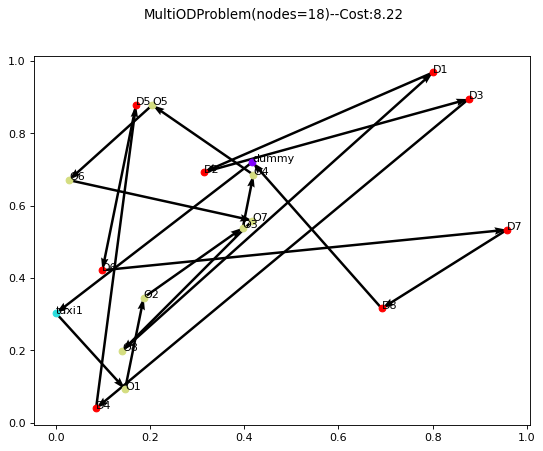

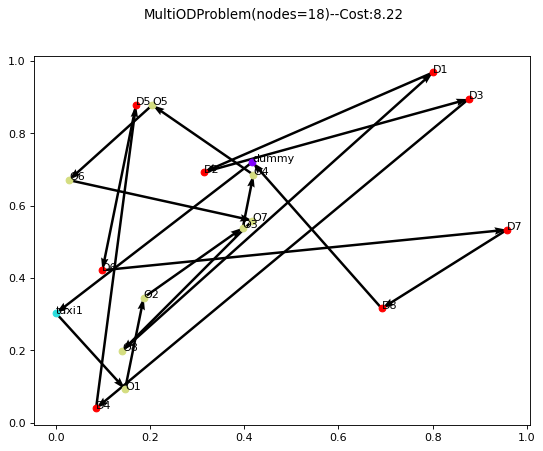

In [16]:
display_result(p, s)

In [14]:
# L2I operators, state

In [15]:
# operators:
# in-block optimization: 2-opt
# O up, D down
# O down, D up 